<h1><center>Analise Titanic!</center></h1>

O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável". Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época. O RMS Titanic realizou sua primeira e unica viagem em 10 de abril de 1912, saindo de Southampton Inglaterra, passou por Cherbourg na Franca e Queenstown na Irlanda com destino final para New York. O dataset trabalhado é uma amostra com 861 passageiros, estimasse que sejam 2208 pessoas a bordo, destas funcionarios e passageiros.

## Base de Dados...
A base de dados trabalhada faz parte do projeto 2 do curso de Fundamentos de Data Science I da Udacity, o conjunto de dados tem origem do site Kaggle - temos aqui dados demograficos e informacoes de XXX dos 2208 segundo a enciclopedia titanic, com base nessas informacoes levantarei questionamentos e respostas.

Link Interresantes:
<br>
<br>https://br.udacity.com/course/fundamentos-data-science-i-python--nd110
<br>
<br>https://www.kaggle.com/c/titanic
<br>
<br>https://pt.wikipedia.org/wiki/RMS_Titanic

## Questionando:
<br>
Qual a relacao entre sobreviver e a idade dos passageiros ?<br>
A classe interfere nas chances de sobreviver ?<br>
A classe dos passageiros tem relação com a idade ?<br>
Qual o sexo com maior chances de sobreviver ?<br>
***

In [1]:
#importando pacotes e carregando arquivo csv
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('titanic-data-6.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Limpando os Dados...

>renomeando colunas:

In [3]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

df.head(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


>Removendo Colunas irrelevantes

In [4]:
df.drop(['passengerid', 'ticket'], axis=1, inplace=True)

df.head(1)

,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,NaN,S


## Tratando dados nulos...

In [5]:
df.shape

(891, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


>**preenchendo dados nulos:**

In [7]:
df['age'].fillna(df['age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         891 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


## Dados tratados!
***

## Q1: Qual a relacao entre sobreviver e a idade dos passageiros ?

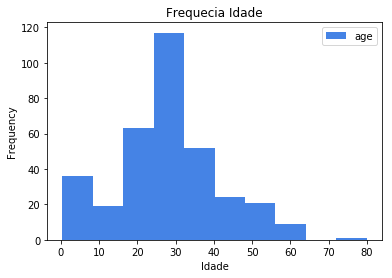

In [8]:
survivors = df.query('survived == 1')
survivors.plot(kind='hist', y='age', title='Frequecia Idade', color=[('#4583E5')]).set_xlabel("Idade");

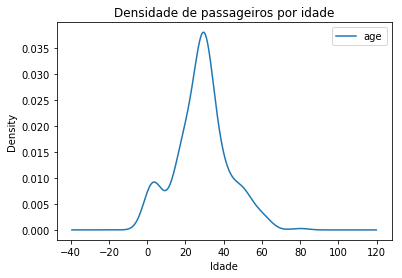

In [9]:
survivors.plot(kind='kde', y='age', title='Densidade de passageiros por idade').set_xlabel("Idade");

In [10]:
df.groupby(['survived']).mean()['age']

survived
0    30.415100
1    28.549778
Name: age, dtype: float64

## Conclusão:
>Pessoas entre as idades de **20** a **40** anos, sao mais propicias a sobreviverem, e tambem são a grande maioria a bordo, e a média da idade dos sobreviventes é por volta dos 28 anos.
****

## Q2: A classe interfere nas chances de sobreviver ?

>**Frequencia de passageiros por classe:**

In [11]:
def calc_Pclass(df):
    """
    printa a frequencia de passageiros por classe
    
    Parametros:
    dt -- dataframe 
    
    Retorna:
    strings com a classe e a frequencia de passageiros referente a classe
    """
    classes = df['pclass'].unique()
    for pclass in classes:
        total = df.shape[0]
        print('Class: {0} Quantidade: {1}'.format(
                pclass, (df.query("pclass == @pclass")['pclass'].count()/total)*100))

print("")
calc_Pclass(df)


Class: 3 Quantidade: 55.106621773288445
Class: 1 Quantidade: 24.242424242424242
Class: 2 Quantidade: 20.65095398428732


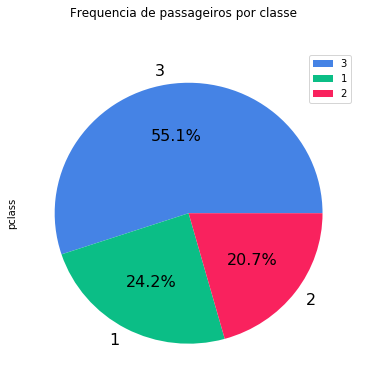

In [12]:
df.pclass.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), subplots=True, colors=[
    ('#4583E5'), ('#0BBE86'),  ('#F9225E')], title='Frequencia de passageiros por classe', legend=True, fontsize=16);

>**Frequencia de sobreviventes por classe:**

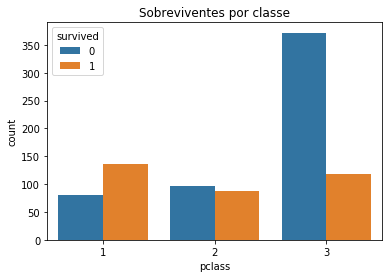

In [21]:
sns.countplot('pclass',hue='survived',data=df).set_title('Sobreviventes por classe');

In [14]:
print('chance de sobreviver da classe 1: {0}% \nchance de sobreviver da classe 2: {1}% \nchance de sobreviver da classe 3: {2}%'.format(
    (survivors.groupby(['pclass']).sum()['survived'][1] / df.groupby(['pclass']).nunique()['name'][1])*100, 
    (survivors.groupby(['pclass']).sum()['survived'][2] / df.groupby(['pclass']).nunique()['name'][2])*100, 
    (survivors.groupby(['pclass']).sum()['survived'][3] / df.groupby(['pclass']).nunique()['name'][3])*100))

chance de sobreviver da classe 1: 62.96296296296296% 
chance de sobreviver da classe 2: 47.28260869565217% 
chance de sobreviver da classe 3: 24.236252545824847%


## Conclusão:
>Pessoas na primeira classe tem a maior chance de sobreviver com 63% de chance, a segunda classe com 47% de chance, e a terceira com 24% de chance de sobrevivencia.
****

# Q3 A classe dos passageiros tem relação com a idade ?

In [15]:
print("média da idade dos passageiros da primeira classe: {0}\nmédia da idade dos passageiros da segunda classe: {1}\nmédia da idade dos passageiros da terceira classe: {2}".format(
    df.groupby(['pclass']).mean()['age'][1],
    df.groupby(['pclass']).mean()['age'][2],
    df.groupby(['pclass']).mean()['age'][3]))

média da idade dos passageiros da primeira classe: 37.04811819172115
média da idade dos passageiros da segunda classe: 29.8669581202046
média da idade dos passageiros da terceira classe: 26.403258655804464


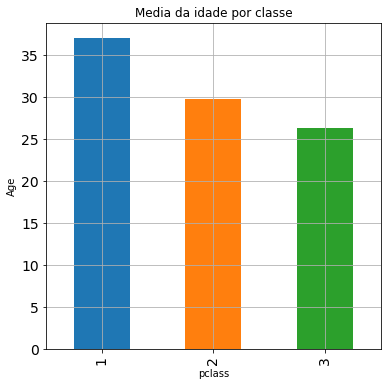

In [16]:
df.groupby(['pclass']).mean()['age'].plot(
    kind='bar', grid=True, figsize=(6,6), fontsize=(14), title='Media da idade por classe').set(
    ylabel='Age');

## Conclusão:
>Os passageiros da primeira classe tem uma media de idade mais alta, oque leva a pensar que pessoas mais velhas tem mais disposicao em gastar mais para ter o luxo de primeira classe.

# Q4 Qual o sexo com maior chances de sobreviver ?

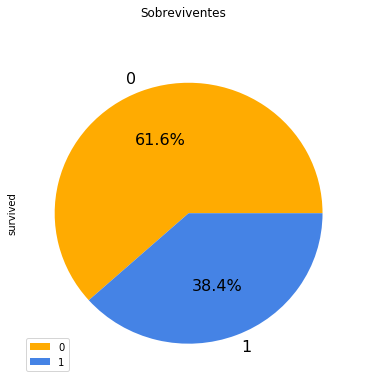

In [17]:
df.survived.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), subplots=True, colors=[('#FFAB01'), ('#4583E5')],
                                title='Sobreviventes', legend=True, fontsize=16);

## Conclusão:
>Apenas 38.4% das pessoas sobreviveram e os outros 61.6% nao sobreviveram

###

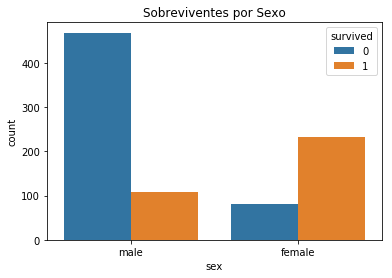

In [20]:
sns.countplot('sex',hue='survived',data=df).set_title('Sobreviventes por Sexo');

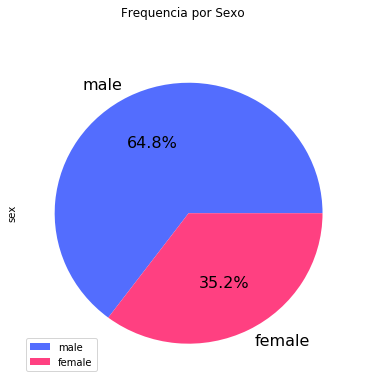

In [19]:
df.sex.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), subplots=True, colors=[('#536dfe'), ('#ff4081')],
                                title='Frequencia por Sexo', legend=True, fontsize=16);

## Conclusão:
>Mulheres tem uma frequecia muito maior que a dos homens de sobreviver. Homens sao a grande maioria, sendo 64.8% da tripulacao, e as mulheres apenas 35.2%. Pode se inferir que as mulheres tinha preferencia nos barcos de resgate, pois teem a maior frequencia de sobrevivencia entre os dois sexos.

****

# Conclusões
Analisando os dados do titanic, fica evidente que passageiros de classe superior tiveram privilegio no acesso a botes salva vidas.
A primeira classe tendo 63% de sobreviventes, segunda e terceira classe tiveram respectivamente 47% e 24% de sobreviventes.
A media da idade dos sobreviventes é 28/29 anos.
Apenas 38.4% dos passageiros sobreviveram, por toda via as mulheres tiveram uma frequencia de sobrevivencia muito maior que a dos homens.

# Limitacões
Durante a analise econtrou-se fatores de limitacao como a falta de valores de alguns passageiros. Estes são: Age, Cabin e Embarked.
    
* **medidas tomada:**
        * Age: Os valores faltantes foram preenchidos com base na idade media.
          Cabin: Como nao foi utilizada na analize nao foi feito modificacões.
          Embarked: Como nao foi utilizada na analize nao foi feito modificacões.